In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [6]:
df = pd.read_csv('../DATA/RSCCASN.csv',parse_dates=True,index_col='DATE')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [8]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [9]:
df.columns= ['Sales']

<AxesSubplot:xlabel='DATE'>

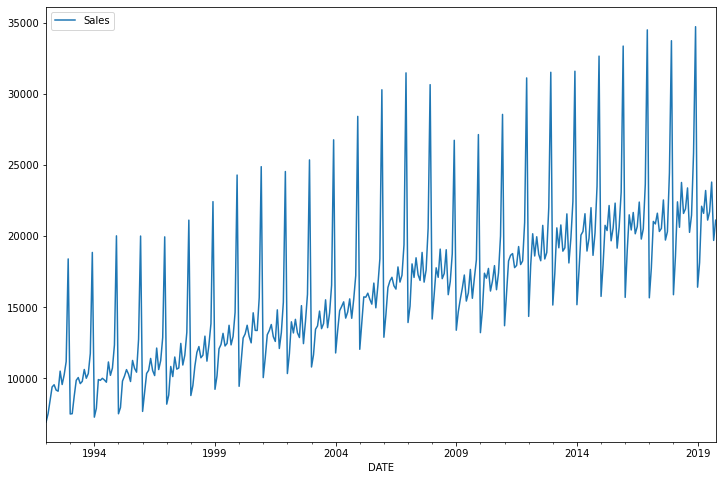

In [12]:
df.plot(figsize=(12,8))

In [13]:
len(df)

334

In [14]:
len(df)-18

316

In [16]:
test_size=18
test_ind=len(df)-test_size
test_ind

316

In [17]:
train=df.iloc[:test_ind]
test=df.iloc[test_ind:]

In [18]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [19]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler=MinMaxScaler()

In [23]:
scaler.fit(train)

MinMaxScaler()

In [47]:
scaled_train = scaler.transform(train)

In [48]:
scaled_test = scaler.transform(test)

In [49]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [50]:
len(test)

18

In [51]:
length_batch=12
generator = TimeseriesGenerator(scaled_train,
                               scaled_train,
                               length=length_batch,
                               batch_size=1)

In [52]:
X,y=generator[0]

In [53]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [54]:
y

array([[0.02047633]])

In [55]:
scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [56]:
len(X[0])

12

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [58]:
n_features=1

In [93]:
model=Sequential()

model.add(LSTM(200,activation='relu',input_shape=(length_batch,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [94]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [95]:
from tensorflow.keras.callbacks import EarlyStopping

In [96]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [97]:
validation_generator=TimeseriesGenerator(scaled_test,scaled_test,
                                        length=length_batch,
                                        batch_size=1)

In [98]:
model.fit(generator,epochs=20,
          validation_data=validation_generator,
          callbacks=[early_stop])

Epoch 1/20
304/304 [==============================] - 4s 9ms/step - loss: 0.0244 - val_loss: 0.0036
Epoch 2/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0122 - val_loss: 0.0372
Epoch 3/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0068 - val_loss: 0.0019
Epoch 4/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0068 - val_loss: 0.0024
Epoch 5/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 6/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0013 - val_loss: 1.9254e-04
Epoch 7/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0013 - val_loss: 7.7172e-04
Epoch 8/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0013 - val_loss: 6.4137e-04


In [99]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

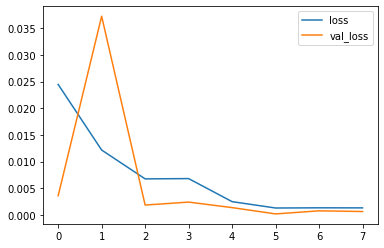

In [100]:
losses.plot()

In [101]:
test_predictions = []
first_eval_batch=scaled_train[-length_batch:]
current_batch=first_eval_batch.reshape((1,length_batch,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [102]:
true_predictions = scaler.inverse_transform(test_predictions)

In [103]:
test['Predictions'] = true_predictions

<ipython-input-103-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [104]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,21913.419414
2018-06-01,21589,20783.095650
2018-07-01,21919,20974.495830
2018-08-01,23381,22699.386044
2018-09-01,20260,20231.551267
2018-10-01,21473,20772.053237
2018-11-01,25831,24501.463151
2018-12-01,34706,33360.280650
2019-01-01,16410,16840.161330


<AxesSubplot:xlabel='DATE'>

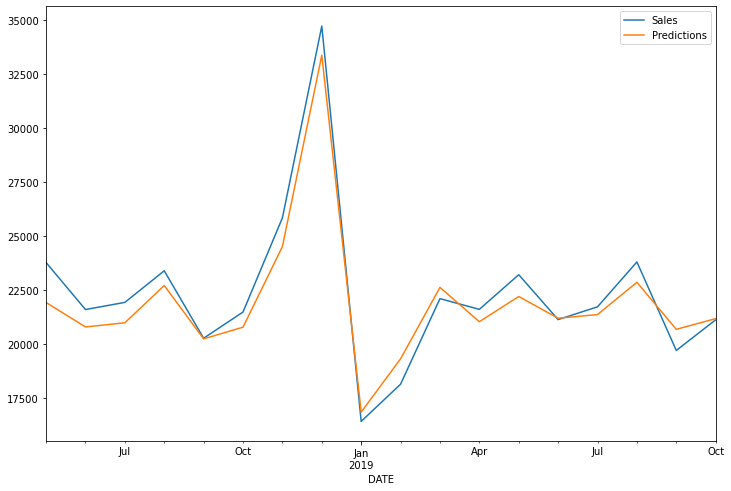

In [105]:
test.plot(figsize=(12,8))

In [106]:
full_scaler=MinMaxScaler()
scaled_full_data=full_scaler.fit_transform(df)

In [107]:
length = 12

generator=TimeseriesGenerator(scaled_full_data,scaled_full_data,
                              length=length,
                              batch_size=1)

In [108]:
model=Sequential()

model.add(LSTM(200,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit(generator,epochs=8)

Epoch 1/8
322/322 [==============================] - 4s 9ms/step - loss: 0.0230
Epoch 2/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0141
Epoch 3/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0045
Epoch 4/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0027
Epoch 5/8
322/322 [==============================] - 4s 12ms/step - loss: 0.0038
Epoch 6/8
322/322 [==============================] - 4s 13ms/step - loss: 0.0013
Epoch 7/8
322/322 [==============================] - 4s 12ms/step - loss: 0.0015
Epoch 8/8
322/322 [==============================] - 4s 12ms/step - loss: 0.0013


In [109]:
forecast = []

periods = 12

first_eval_batch=scaled_train[-length_batch:]
current_batch=first_eval_batch.reshape((1,length_batch,n_features))

for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [110]:
forecast = scaler.inverse_transform(forecast)

In [111]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [112]:
forecast

array([[22555.99064445],
       [21204.29162407],
       [21420.91237211],
       [23372.93710375],
       [20587.32595229],
       [21138.54116488],
       [25366.08439779],
       [35088.40347099],
       [16672.61824584],
       [19580.30420613],
       [23331.8654356 ],
       [21504.20821714]])

In [114]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,freq="MS")

In [115]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [118]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                          columns=['Forecast'])

In [119]:
forecast_df

,Forecast
2019-11-01,22555.990644
2019-12-01,21204.291624
2020-01-01,21420.912372
2020-02-01,23372.937104
2020-03-01,20587.325952
2020-04-01,21138.541165
2020-05-01,25366.084398
2020-06-01,35088.403471
2020-07-01,16672.618246
2020-08-01,19580.304206


<AxesSubplot:xlabel='DATE'>

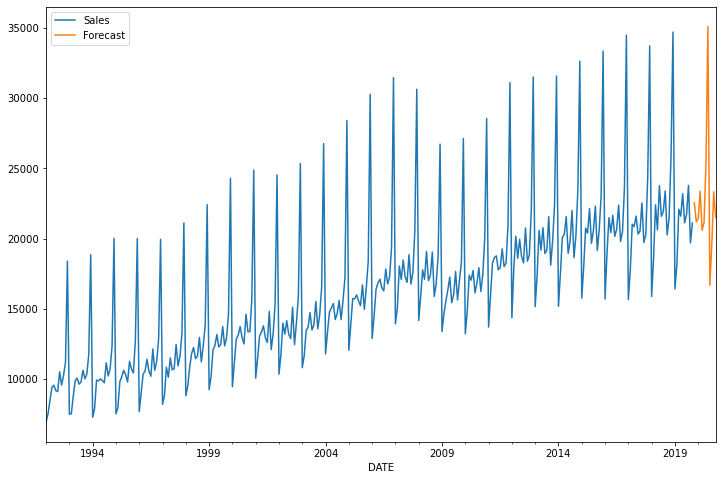

In [123]:
ax=df.plot()
forecast_df.plot(ax=ax,figsize=(12,8))